# CDNOW用户消费数据分析

> # 目录

> 一、项目背景 

> 二、数据的导入与处理

> 三、描述性统计

> 四、用户消费数据分析

>> 4.1 订单商品数量分析

>> 4.2 订单金额分析

>> 4.3 消费趋势分析

>> 4.4 用户的消费金额与数量总览

>> 4.5 用户的消费金额与数量相关分析

>> 4.6 用户消费金额分析

>> 4.7 用户消费数量分析

>> 4.8 用户消费累计百分比分析

>> 4.9用户消费周期分析

>> 4.10 用户分层

>> 4.11 用户复购与回购分析

> 五、结论

# 一、项目背景
CDNOW曾经是一家在线音乐零售平台，后被德国波泰尔斯曼娱乐集团公司出资收购，其资产总价值在最辉煌时曾超过10亿美元。本文主要通过分析CDNow网站的用户购买明细来分析该网站的用户消费行为，使运营部门在营销时更加具有针对性，从而节省成本，提升效率。

# 二、数据导入

### 2.1 导入常用库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### 2.2 导入数据

In [2]:
columns=['user_id','order_dt','order_product','order_amount']
df=pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')

In [3]:
# 查看是否有缺失值
df.isnull().sum()

user_id          0
order_dt         0
order_product    0
order_amount     0
dtype: int64

In [4]:
## 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
order_dt         69659 non-null int64
order_product    69659 non-null int64
order_amount     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### 2.3 数据处理

In [5]:
#转变数字类型
df['order_dt']=pd.to_datetime(df.order_dt,format='%Y%m%d')

In [6]:
df['month']=df.order_dt.values.astype('datetime64[M]')

# 三、描述性统计

In [7]:
df.describe()

,user_id,order_product,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


- 该数据集共有69,659笔订单；
- 每笔订单的商品数量的中位数为2，最少为1，最多为99,但下四分位数为3，可见75%的订单商品数量在3件以下，仅有少部分订单有较大的交易数量；
- 每笔订单平均花费为35.9元，订单金额的标准差为36.3，中位数为25，可见订单金额的波动较大，受极值干扰，数据右偏
- 每笔订单平均花费的最大值为1286.01元，然而最小值却为0元，猜测这部分订单可能是由于订单取消/折扣抵消为0等其他原因

# 四、用户消费数据分析

### 4.1 订单商品数量分析

In [8]:
a=pd.DataFrame(df.order_product)
a.query('order_product<=3').count()/df.order_dt.count()

order_product    0.817812
dtype: float64

- 商品数量小于等于3件的订单占比达到了81.8%

### 4.2 订单金额分析

In [9]:
a=pd.DataFrame(df.order_amount)
a.query('order_amount<=50').count()/df.order_amount.count()

order_amount    0.798719
dtype: float64

- 消费金额小于50元的订单占比达到80%

### 4.3 消费趋势分析

- 随时间变化趋势

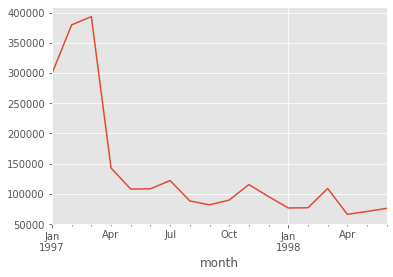

In [10]:
#按月分组 每月消费金额图
grouped_month=df.groupby('month')
order_month_amount=grouped_month.order_amount.sum()
order_month_amount.plot()

- 可以看出前三月消费逐渐增加，在三月到达最大值。
- 三月到四月迅速下降，可能是因为停止促销。

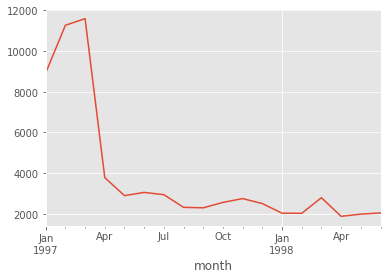

In [11]:
#按订单时间分组 每月订单数量图
grouped_month.order_dt.count().plot()

- 购买次数前三月消费逐渐增加，在三月到达最大值。

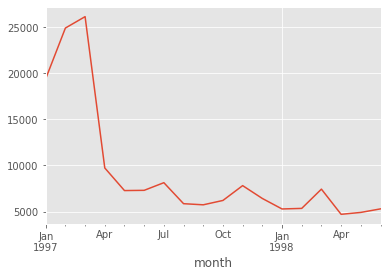

In [12]:
#每月销售数量图
grouped_month.order_product.sum().plot()

- 销量在2，3月达到25000+

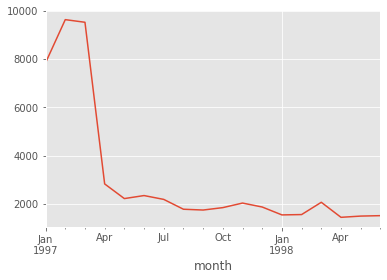

In [13]:
#注册人数图
grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())).plot()

- 注册人数在三月开始降低

#### 综上，商品销量、销售金额、销售数量以及消费人数在一开始有大幅增长，但随着时间的增长，订单大幅下降后趋于稳定，主要原因是老用户流失大，新用户增长低。

### 4.4 用户的消费金额与数量总览

In [14]:
grouped_user=df.groupby('user_id')

In [15]:
grouped_user.sum().describe()

,order_product,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 用户购买数量的平均值为7件，中位数为3件，受极值影响；
- 用户购买的金额的平均数为106.1元，中位数为43.4元，受极值影响；
- 总体而言，符合“二八法则”，小部分消费者有着高额的消费。

### 6.5 用户消费金额和消费数量的相关分析

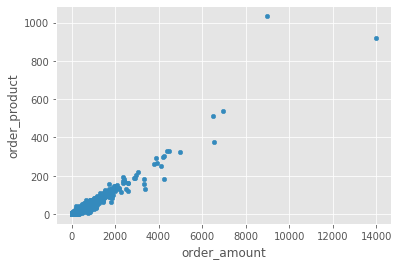

In [18]:
#消费金额散点图
grouped_user.sum().plot.scatter(x='order_amount',y='order_product')

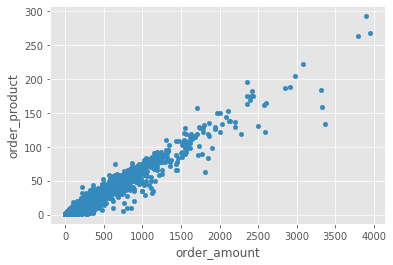

In [17]:
#订单金额小于四千元的散点图
grouped_user.sum().query('order_amount<4000').plot.scatter(x='order_amount',y='order_product')

- 订单数量与订单金额有着较强的线性相关性

### 4.6 用户消费金额分析

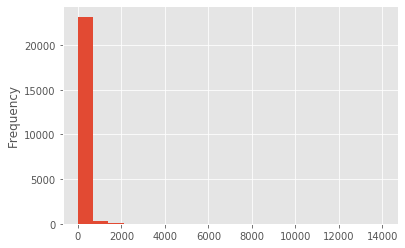

In [19]:
grouped_user.sum().order_amount.plot.hist(bins=20)

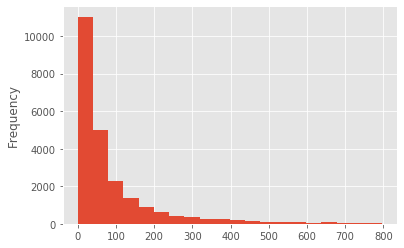

In [20]:
grouped_user.sum().query('order_amount<800').order_amount.plot.hist(bins=20)

- 大多数消费者消费金额在100以下

### 4.7 用户消费数量分析

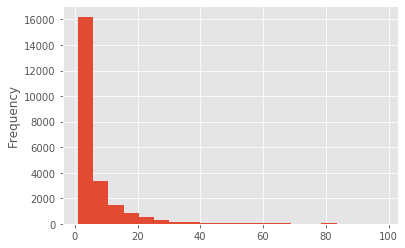

In [21]:
grouped_user.sum().query('order_product<100').order_product.plot.hist(bins=20)

- 绝大多数客户购买数量在10件以下

### 4.8 用户消费累计百分比分析

In [22]:
user_cumsum=(grouped_user.sum().sort_values('order_amount').cumsum())/2500315.63
user_cumsum

,order_product,order_amount
user_id,,
10175,3.999495e-07,0.000000
4559,7.998990e-07,0.000000
1948,1.199849e-06,0.000000
925,1.599798e-06,0.000000
10798,1.999748e-06,0.000000
...,...,...
7931,6.599847e-02,0.985405
19339,6.614965e-02,0.988025
7983,6.636402e-02,0.990814


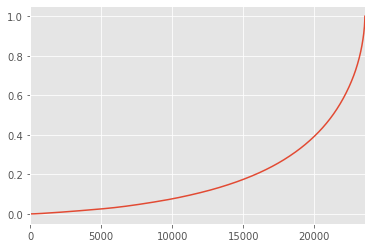

In [23]:
user_cumsum=(grouped_user.sum().sort_values('order_amount').cumsum())/df.sum().order_amount
user_cumsum.reset_index().order_amount.plot()

- 5000个用户占了40%消费额

### 4.9 用户生命周期分析

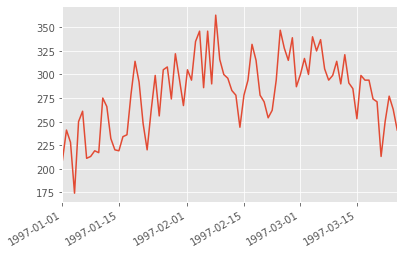

In [24]:
#用户首次消费
grouped_user.order_dt.min().value_counts().plot()

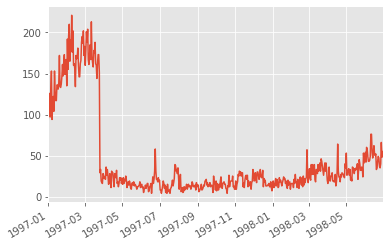

In [25]:
#最后一次消费
grouped_user.order_dt.max().value_counts().plot()

In [26]:
user_life=grouped_user.order_dt.agg(['min','max'])
user_life

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


In [27]:
(user_life['min']==user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

- 一半的用户生命周期只有一天，猜测这部分用户是由促销活动吸引来的

In [28]:
#用户每笔订单间隔
order_diff=grouped_user.order_dt.apply(lambda x:x-x.shift())
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

- 50%的用户订单间隔在31天

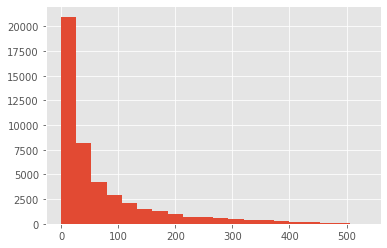

In [29]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

In [30]:
(user_life['max']-user_life['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

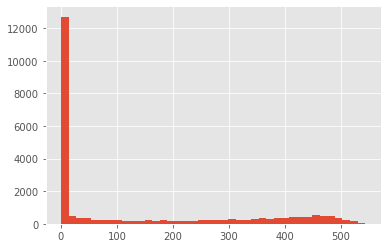

In [31]:
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=40)

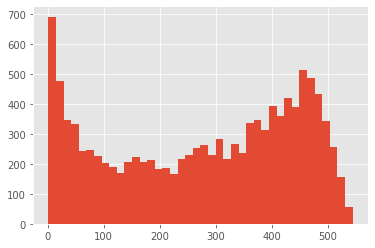

In [32]:
u=((user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D'))
u_1=u[u>0].hist(bins=40)

- 首单基本都分布在前三个月
- 最后一单的消费时间分布跨度较大，但大部分也集中在前三个月

### 4.10 用户分层

#### 构建RFM模型

In [44]:
rfm=df.pivot_table(index='user_id',
                  values=['order_product','order_amount','order_dt'],
                  aggfunc={'order_product':'sum',
                          'order_amount':'sum',
                          'order_dt':'max'})

In [45]:
rfm.rename(columns={'order_amount':'M','order_product':'F'},inplace=True)

In [46]:
rfm['R']=(rfm.order_dt.max()-rfm.order_dt)/np.timedelta64(1,'D')
rfm=rfm[['R','F','M']]
rfm

,R,F,M
user_id,,,
1,545.0,1,11.77
2,534.0,6,89.00
3,33.0,16,156.46
4,200.0,7,100.50
5,178.0,29,385.61
...,...,...,...
23566,462.0,2,36.00
23567,462.0,1,20.97
23568,434.0,6,121.70


In [36]:
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>0 else '0')
    label=level.R+level.F+level.M
    d={'110':'一般价值客户',
       '100': '一般挽留客户',
      '010': '一般保持客户',
      '000': '一般发展客户',
      '111':'重要价值客户',
      '011': '重要保持客户',
      '101': '重要挽留客户',
      '001': '重要发展客户'}
    return d[label]

In [48]:
b=rfm-rfm.mean()
rfm['label']=b.apply(rfm_func,axis=1)
rfm

,R,F,M,label
user_id,,,,
1,545.0,1,11.77,一般挽留客户
2,534.0,6,89.00,一般挽留客户
3,33.0,16,156.46,重要保持客户
4,200.0,7,100.50,一般发展客户
5,178.0,29,385.61,重要保持客户
...,...,...,...,...
23566,462.0,2,36.00,一般挽留客户
23567,462.0,1,20.97,一般挽留客户
23568,434.0,6,121.70,重要挽留客户


In [49]:
rfm.groupby('label').count()

,R,F,M
label,,,
一般价值客户,77,77,77
一般保持客户,206,206,206
一般发展客户,3300,3300,3300
一般挽留客户,14074,14074,14074
重要价值客户,787,787,787
重要保持客户,4554,4554,4554
重要发展客户,331,331,331
重要挽留客户,241,241,241


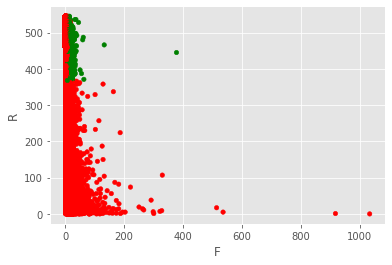

In [50]:
rfm.loc[rfm.label=="重要价值客户",'color']='g'
rfm.loc[~(rfm.label=="重要价值客户"),'color']='r'
rfm.plot.scatter(x='F',y='R',c=rfm.color)

从RFM分层可看出大多数客户为重要发展客户

### 按活跃程度分层

In [51]:
pivoted_counts=df.pivot_table(index='user_id',
                            columns='month',
                            values='order_dt',
                            aggfunc='count').fillna(0)

In [52]:
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)

In [54]:
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
def active_status(data):
    status=[]
    for i in range (18):
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                elif status[i-1]=='active':
                    status.append('unactive')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('new')
                elif status[i-1]== 'unactive':
                    status.append('return')
                else:
                    status.append('active')
            else:
                status.append('new')
    return status

In [56]:
columns=df.groupby('month').sum().reset_index().month

In [64]:
purchase_status=df_purchase.apply(lambda x:pd.Series(active_status(x),index=columns),axis=1)

In [63]:
purchase_status

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [65]:
purchase_status_ct=purchase_status.replace('unreg',np.NaN).apply(lambda x:x.value_counts())

In [66]:
purchase_status_ct.fillna(0)

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,0.0,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


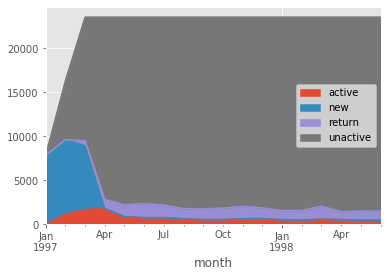

In [67]:
purchase_status_ct.fillna(0).T.plot.area()

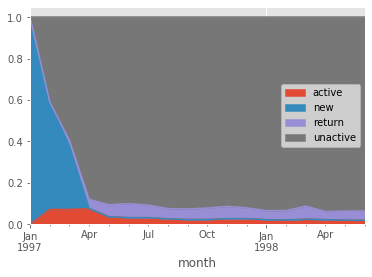

In [68]:
purchase_status_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1).plot.area()

- 活跃用户：前三月增长趋势，之后呈下降趋势，趋于稳定
- 新客用户：仅在前三个月有新增用户多
- 回流用户：趋势与活跃用户相似
- 不活跃用户：此层次用户占比极大

### 4.11 用户复购与回购分析

#### 当月复购

In [69]:
purchase_status_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


In [70]:
purchase_r=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x== 0 else 0)

In [71]:
purchase_r

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


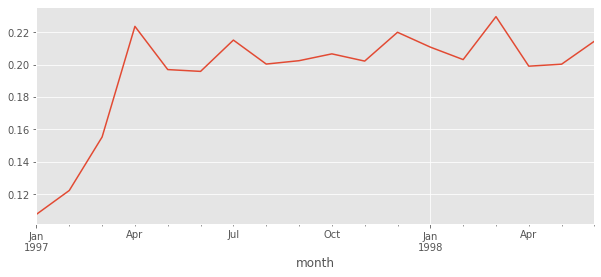

In [72]:
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,4))

- 用户的复购率稳定在20%-22%

### 次月复购

In [73]:
def purchase_back(data):
    status=[]
    for i in range (17):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

In [74]:
purchase_b=df_purchase.apply(lambda x:pd.Series(purchase_back(x),index=columns),axis=1)

In [75]:
purchase_b

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


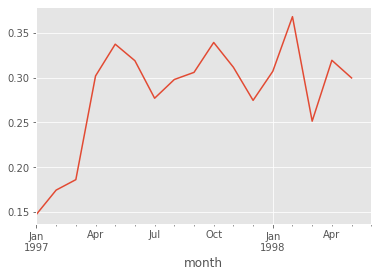

In [76]:
(purchase_b.sum()/purchase_b.count()).plot()

- 用户的次月复购率稳定在30%-35%

# 五、结论

1. 整体趋势：每年的销量和销售额在1-3月份相对极高，然后骤降，原因可能跟这段时间的大力促销或者新品发售有关；
2. 用户个体特征：每笔订单的金额和商品购买量都集中在区间的低段水平，都是小金额小批量进行购买，此类交易群体，可在丰富产品线和增加促销活动提高转换率和购买率；
3. 用户的生命周期：有二次及以上消费的用户的平均生命周期是276天。用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费；
4. 新客户的复购率约为6%，老客户的复购率在20%左右；新客户的回购率在15%左右，老客户的回购率在30%左右，需要营销策略积极引导其再次消费及持续消费